# LA RECHERCHE DE VISAGE

#### Le but finale ce projet est la conception et la valudation d'un systeme de recherche d'image en utilusant les algorithme ALBP et KNN

#### Nous allons  procedé comme suite :

### I :  importation et visialution des données
##### Dataset

    Nous allons utilisé le dataset ORL qui vous nous avez proposé, qui contient 400 images à la basse. Pour ce projet nous allons divisé le data en deux:

    Train_set qui est 90% (360 images , 40 classes et 9 images dans chaque classe) de datset initial et Test_set 10 % (une image de chaque classe donc 40 images)


### II:  Pretraitement des données (indexation)
    Pour le Pretraitement nous allons implementé une fonction (indexation) qui permet de calculer histogramme de l'images albp .

    A la suite cette fonction  nous permet de trouver notre base d'indexation.

### III: Mise en corespondance
    Nous allons implementé l'algorithme KNN en utilisans la distance  eucludienne.

    Pour ça nous allons commencer par implementer une fonction distance (qui calcul la distance de deux vecteur) et une autre all_distance (qui calcul la distance d'un vecteur  par rapport à plusieurs vecteur).

### IV : Valudation
    Il me semble que la fonction validation est bien commenté.




### I : Importation et visialution des données

In [1]:
# les librairis utilisée
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array , load_img
from math import sqrt

2021-12-27 00:19:19.446480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cs/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2021-12-27 00:19:19.446507: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Le chargement et la visialusation des données

In [2]:
# initialisation des parametres
data_dir = 'Faces_1/'
test_dir = 'test_faces/'
NUM_DATA = len(os.listdir(data_dir))
NUM_CATEGORY = int(len(os.listdir(data_dir))/9)

In [3]:
print("Nous avons" ,   NUM_CATEGORY ,  "classes dans notre data ")

Nous avons 40 classes dans notre data 


In [4]:
def data_loader(data_dir):

    images = list()
    labels = list()
    i = 0
    data = os.listdir(data_dir)
    data.sort()
    while i < len(data):
        for j in range(40):
            labels.append(j+1)
            img = load_img(os.path.join(data_dir, data[i + j]), target_size=(80, 70))
            image = img_to_array(img)
            images.append(image)
        i += 40
    return np.array(images), np.array(labels)

In [5]:
data , labels = data_loader(data_dir)
test_data , test_labels = data_loader(test_dir)

In [6]:
print("Les tailles de notre data et test_data  sont :" , data.shape[0] , 'et' , test_data.shape[0], "images")

Les tailles de notre data et test_data  sont : 360 et 40 images


#### Un peu de visualiation 

images originaux


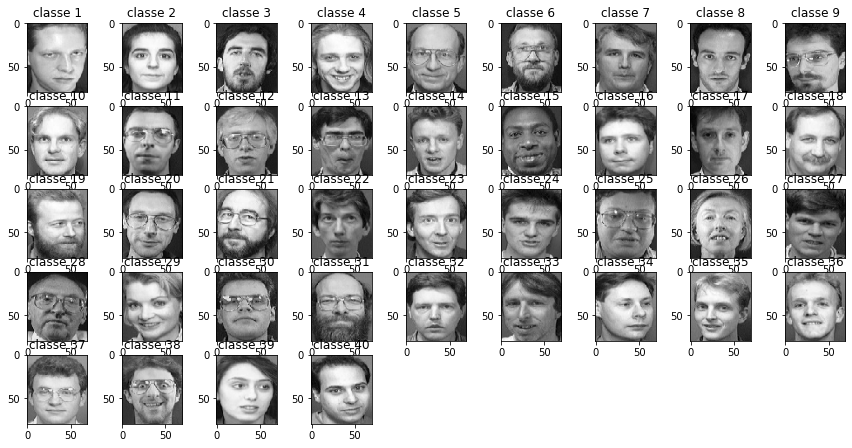

In [7]:
plt.figure(figsize=(15, 15))
for i in range (40):
    plt.subplot(10, 9, i+1)
    img = data[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray, cmap='gray')
    plt.title("classe " + str(labels[i]))
print("images originaux")
plt.show()


images originaux de test data


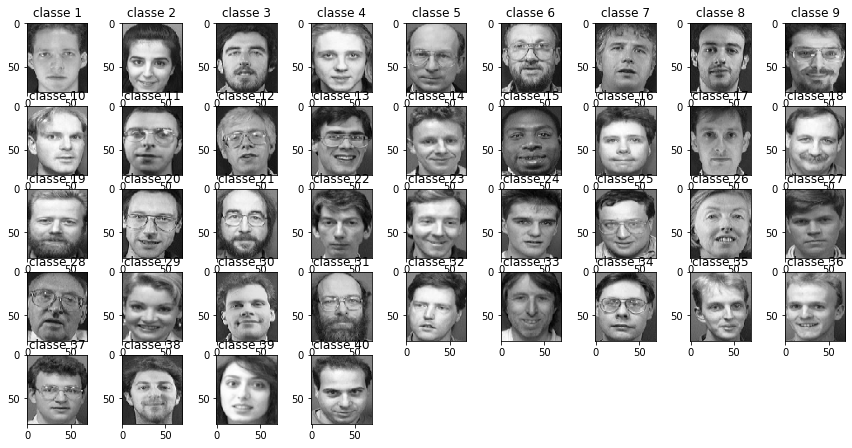

In [8]:
plt.figure(figsize=(15, 15))
for i in range (40):
    plt.subplot(10, 9, i+1)
    img = test_data[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray, cmap='gray')
    plt.title("classe " + str(test_labels[i]))
print("images originaux de test data")
plt.show()

### II: Pretraitement

##### L'implementation de la function ALBP

In [9]:
def get_pixel(img, center, x, y): 
      
    new_value = 1
      
    try: 
        
        if img[x][y] < center: 
            new_value = 0 
    except: 
        pass
      
    return new_value 



def lbp_for_pixel(img, x, y): 
   
    center = img[x][y] 
   
    binary_val = [] # une liste pour stocker les valeurs en binaire avant de passer en decimale
    
    binary_val.append(get_pixel(img, center, x-1, y-1)) 
      
    binary_val.append(get_pixel(img, center, x-1, y)) 
    
    binary_val.append(get_pixel(img, center, x-1, y + 1)) 
      
    binary_val.append(get_pixel(img, center, x, y + 1)) 
      
    binary_val.append(get_pixel(img, center, x + 1, y + 1)) 
    
    binary_val.append(get_pixel(img, center, x + 1, y)) 
      
    binary_val.append(get_pixel(img, center, x + 1, y-1)) 
    
    binary_val.append(get_pixel(img, center, x, y-1)) 
       
       
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(binary_val)): 
        val += binary_val[i] * power_val[i] 
          
    return val 

In [10]:
# la fonction ALBP prend une image et returne sont ALBP calculé (img_albp)
def ALBP(img):
    h, w , _ = img.shape 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_albp = np.zeros((h, w), np.uint8)
    for i in range (0, h):
        for j in range(0, w):
            img_albp[i, j]= lbp_for_pixel(img_gray, i, j) # on appel la fonction lbp_for_pixel

    return img_albp

#### Images après l'application d'ALBP

images ALBP


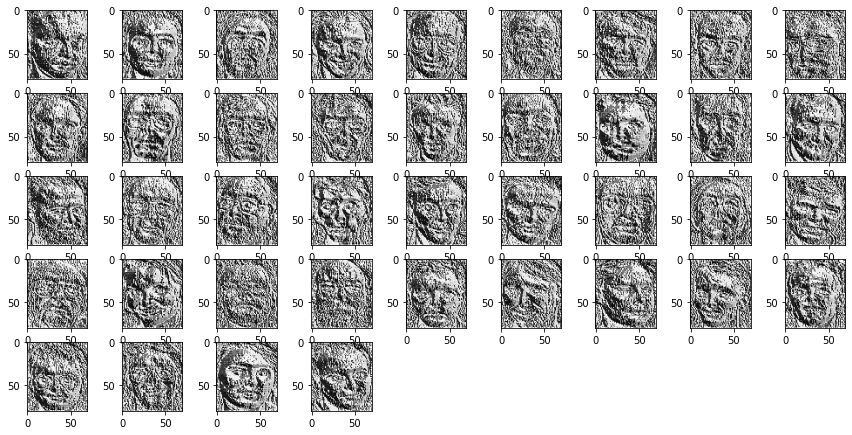

In [12]:
plt.figure(figsize=(15, 15))
for i in range (40):
    plt.subplot(10, 9, i+1)
    img = ALBP(data[i])
    plt.imshow(img, cmap='gray')
print("images ALBP")
plt.show()

In [13]:
# la fonction histogramme
def histogram(img):
   return np.array([ (img == i).sum() for i in range(256)])

#### Histogramme des 5 premièrs images ALBP de notre data

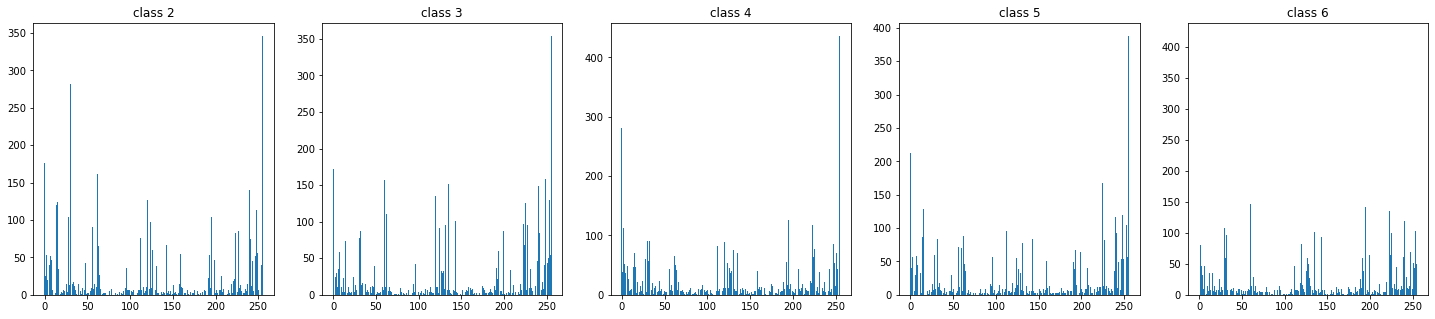

In [14]:
plt.figure(figsize=(25 , 5))
y = [i for i in range(256)]
for i in range(5):
    plt.subplot(1, 5 ,i+1)
    plt.bar(y, histogram(ALBP(data[i])))
    plt.title("class " + str(labels[i+1]))
plt.show()

### Constriction de la base indexation

In [15]:
# cette fonction returne une list avec histogramme im
def img_descripteur(data):
    base_indexation = list()
    for i in data:
        base_indexation.append(histogram(ALBP(i)))
    return base_indexation

In [16]:
data_descrip = np.array(img_descripteur(data))
test_data_descrip = np.array(img_descripteur(test_data))

### III: La corespondance

In [17]:
# la distance comme expliquer au depuis
def distance(hist1, hist2):

    distance = np.array([((hist1[i] - hist2[i])**2) for i in range(256)])

    dist = sqrt(distance.sum())

    return dist

In [18]:
# la fonction all_distance comme expliquer au depuis
def all_distance(hist , data):
    result = list()
    for i in data:
        result.append(distance(hist , i))
    return np.array(result)

In [19]:
"""
La fonction KNN.

cette fonction prends trois parametres :
img : une image;
data : la base de recherche;
k : le nombre de vasins plus proches.
et elle returne une liste des k element les plus proches et une autre qui contient index dans la base
"""
def KNN(img, data, k):
    k_n = list()
    dist = all_distance(img, data)
    dist_sort = np.sort(dist)
    dist = dist.astype(float)
    for i in range(k):
        k_n.append(dist_sort[i])
    index = np.array([np.where(dist==i)  for i in k_n])
    index = index.reshape(k)
    return np.array(k_n) , index


In [20]:
""" returne le nombre de fois d'apparition d'une classe
    on commence par  1 car la premièr classe est numeroté part 1
"""
def number_n(val):
    return np.array([(val == i).sum() for i in range(1, NUM_CATEGORY+1)])

In [21]:
# cette fonction retourne le numéro de classe corespante et les indexe des k vasins plus proches
def research(img, data , k):
    k_val, index = KNN(img, data, k)
    n_proches = number_n(labels[index])
    id = np.where(n_proches == n_proches.max())[0][0]
    classe = labels[id]
    return classe , index , id


#### verifions ça !!!

Image à recherche


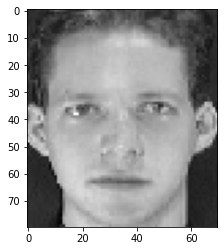

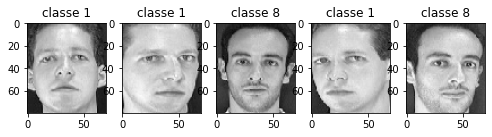

image est de classe :  1
Image à recherche


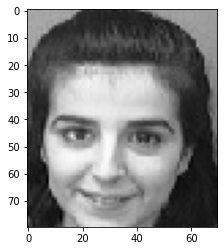

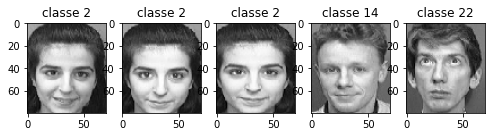

image est de classe :  2
Image à recherche


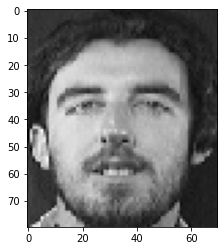

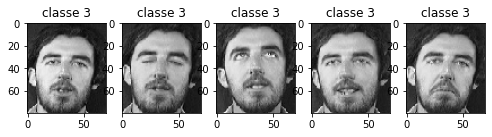

image est de classe :  3
Image à recherche


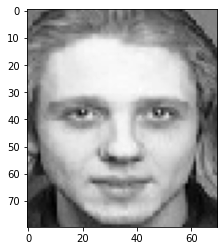

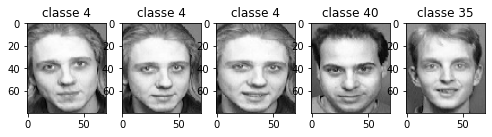

image est de classe :  4
Image à recherche


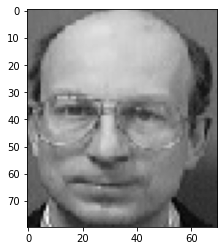

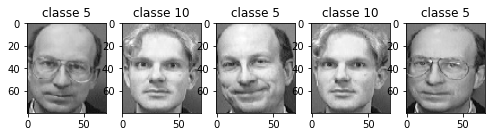

image est de classe :  5


In [22]:
for i in range(5):
    classe, index , id = research(test_data_descrip[i], data_descrip , 5)
    plt.imshow(cv2.cvtColor(test_data[i], cv2.COLOR_BGR2GRAY) , cmap='gray')
    print("Image à recherche")
    plt.figure(figsize=(15 , 15))
    for j in range(len(index)):
        plt.subplot(1, 9, j+1)
        plt.imshow(cv2.cvtColor(data[index[j]], cv2.COLOR_BGR2GRAY) , cmap='gray')
        plt.title("classe " + str(labels[index[j]]))
    plt.show()

    print("image est de classe : ", classe)

### IV: La valudation
    Maintenant nous allons valudé notre systeme

In [23]:
"""
cette fonctin sert à valudé le systeme.
Elle prends quantre parametre test_data(une base de test ) , data , n_sample (le nombre d'images à tester)  k comme la fonction KNN.
Elle retourne le pourcentage de resuite et index de tous les k vasins pour images dans test_data 

"""
def valudation (test_data ,data, k,  n_sample =10):
    val = []
    all_index = []
    for i in range(n_sample):
        k_val, index = KNN(test_data[i], data, k)
        n_proches = number_n(labels[index])
        id = np.where(n_proches == n_proches.max())[0][0]
        if test_labels[i]== id + 1: 
            val.append(1)
        else: 
            val.append(0)
        all_index.append(index)
    cross_val = (np.array(val).sum()/n_sample)*100
    return cross_val , all_index , val

### Allons maintenant tester notre système avec les differente valeur de n_sample (nombre d'images)

In [24]:
print("Pour n_sample = 5")
for k in range(1 , 10, 2):
    cross_val , all_index , val = valudation(test_data_descrip , data_descrip , k, 5 )
    print(val)
    print("pour k = " , k , "cross_val = " , cross_val, "%")


Pour n_sample = 5
[1, 1, 1, 1, 1]
pour k =  1 cross_val =  100.0 %
[1, 1, 1, 1, 1]
pour k =  3 cross_val =  100.0 %
[1, 1, 1, 1, 1]
pour k =  5 cross_val =  100.0 %
[1, 1, 1, 1, 1]
pour k =  7 cross_val =  100.0 %
[0, 1, 1, 1, 1]
pour k =  9 cross_val =  80.0 %


In [25]:
print("Pour n_sample = 10")
for k in range(1 , 10, 2):
    cross_val , all_index , val = valudation(test_data_descrip , data_descrip , k )
    print(val)
    print("pour k = " , k , "cross_val = " , cross_val, "%")

Pour n_sample = 10
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
pour k =  1 cross_val =  90.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
pour k =  3 cross_val =  80.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
pour k =  5 cross_val =  80.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
pour k =  7 cross_val =  80.0 %
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
pour k =  9 cross_val =  60.0 %


In [26]:
print("Pour n_sample = 40")
for k in range(1 , 10, 2):
    cross_val , all_index , val = valudation(test_data_descrip , data_descrip , k , 40)
    print(val)
    print("pour k = " , k , "cross_val = " , cross_val, "%")

Pour n_sample = 40
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pour k =  1 cross_val =  90.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pour k =  3 cross_val =  80.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
pour k =  5 cross_val =  75.0 %
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
pour k =  7 cross_val =  72.5 %
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
pour k =  9 cross_val =  55.00000000000001 %


### sauvegardons les resultats de valudation dans un fichier excel et csv

In [27]:
list_val = []
list_k = []
list_cross_val = []

for k in range(1 , 10, 2):
    str_val = " "
    cross_val , all_index , val = valudation(test_data_descrip , data_descrip , k , 40)
    for i in val:
        str_val += str(i)
    list_val.append(str_val)
    list_k.append(k)
    list_cross_val.append(cross_val)

In [28]:
df = pd.DataFrame(list(zip(list_k, list_val, list_cross_val)) , columns=["k" , "valudation pour chaque image( 1 = True , 0 = false)", "cross_val %"])

In [29]:
df.to_excel("Coulibaly_Soumaila_valudation.xlsx")
df.to_csv("Coulibaly_Soumaila_valudation.csv")

### Conclusion

    Nous avons eu une performence moyenne mais le but était de valuder le modèle comme vous l'avez demandé ...

    Nous remarquons que pour tout les n_samples la meilleur est pour k = 1. (90% avec n_sample = 40).